## OVERVIEW
---
* Road Accident analysis per Borough
* Datewise Analysis
* Bivariate and Univariate Analysis
* Per Road Accident type analysis
* Causes of Road Accident in New York City

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

#plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import folium
import datetime
import calendar



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/nypd-motor-vehicle-collisions/socrata_metadata.json
/kaggle/input/nypd-motor-vehicle-collisions/MVCollisionsDataDictionary_20190813_ERD.xlsx
/kaggle/input/nypd-motor-vehicle-collisions/nypd-motor-vehicle-collisions.csv


In [2]:
#get the data
df = pd.read_csv('../input/nypd-motor-vehicle-collisions/nypd-motor-vehicle-collisions.csv', dtype=str)

In [3]:
#sohw dataframe
df.head(3)

,ACCIDENT DATE,ACCIDENT TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2019-08-05T00:00:00.000,16:30,QUEENS,11434,40.6760520,-73.7901840,"{'type': 'Point', 'coordinates': [-73.790184, ...",NaN,NaN,150-08 123 AVENUE,...,Unspecified,NaN,NaN,NaN,4184637,Sedan,Pick-up Truck,NaN,NaN,NaN
1,2019-08-27T00:00:00.000,16:02,BROOKLYN,11225,40.6577800,-73.9510960,"{'type': 'Point', 'coordinates': [-73.951096, ...",NaN,NaN,288 HAWTHORNE STREET,...,Unspecified,NaN,NaN,NaN,4195773,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,2019-08-15T00:00:00.000,17:57,MANHATTAN,10002,40.7181430,-73.9938350,"{'type': 'Point', 'coordinates': [-73.993835, ...",CHRYSTIE STREET,GRAND STREET,NaN,...,NaN,NaN,NaN,NaN,4202457,Sedan,NaN,NaN,NaN,NaN


In [4]:
#dataset shape
print('DATASET SHAPE: ', df.shape)

DATASET SHAPE:  (1612178, 29)


In [5]:
#show feature data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1612178 entries, 0 to 1612177
Data columns (total 29 columns):
 #   Column                         Non-Null Count    Dtype 
---  ------                         --------------    ----- 
 0   ACCIDENT DATE                  1612178 non-null  object
 1   ACCIDENT TIME                  1612178 non-null  object
 2   BOROUGH                        1127553 non-null  object
 3   ZIP CODE                       1127376 non-null  object
 4   LATITUDE                       1415893 non-null  object
 5   LONGITUDE                      1415893 non-null  object
 6   LOCATION                       1415893 non-null  object
 7   ON STREET NAME                 1298002 non-null  object
 8   CROSS STREET NAME              1079193 non-null  object
 9   OFF STREET NAME                219732 non-null   object
 10  NUMBER OF PERSONS INJURED      1612161 non-null  object
 11  NUMBER OF PERSONS KILLED       1612145 non-null  object
 12  NUMBER OF PEDESTRIANS INJURE

In [6]:
#replace capslock to lowercase
df.columns = [i.lower() for i in df.columns]
#date to pandas datetime object
df['accident date'] = pd.to_datetime(df['accident date'])
df['accident time'] = pd.to_datetime(df['accident time']).dt.time

In [7]:
#convert back the numeric features
num_feat = [i for i in df.columns if 'number' in i] + ['latitude', 'longitude']
df[num_feat] = df[num_feat].apply(pd.to_numeric, errors='coerce')

#### CHECK NULL VALUES

In [8]:
#show null value percentage per feature
pd.DataFrame(df.isnull().sum() / df.shape[0] *100, columns=['Missing Value %'])

,Missing Value %
accident date,0.000000
accident time,0.000000
borough,30.060266
zip code,30.071245
latitude,12.175144
longitude,12.175144
location,12.175144
on street name,19.487674
cross street name,33.059935
off street name,86.370488


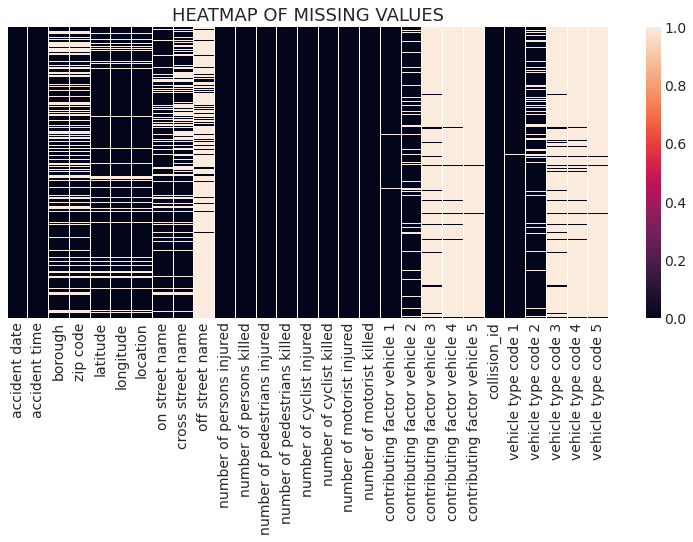

In [9]:
plt.figure(figsize=(12,5))
plt.title('HEATMAP OF MISSING VALUES', fontsize=18)
sns.heatmap(df.isnull(), yticklabels=False)

## EDA
---

### ANALYSIS BY BOROUGH

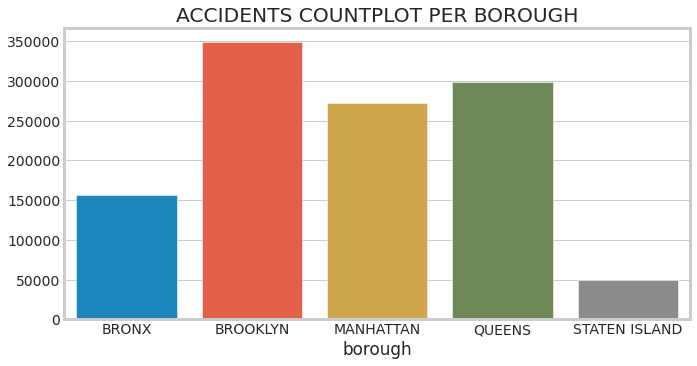

In [10]:
plt.figure(figsize=(10,5))
plt.title('ACCIDENTS COUNTPLOT PER BOROUGH')
sns.barplot(x=df.groupby('borough').size().index,
            y=df.groupby('borough').size().values)

### INSIGHTS
---
* ROAD ACCIDENTS ARE MORE FREQUENT IN BROOKLYN, MANHATTAN AND QUEENS
* STATEN ISLAND HAS THE LOWEST ACCIDENT RATE

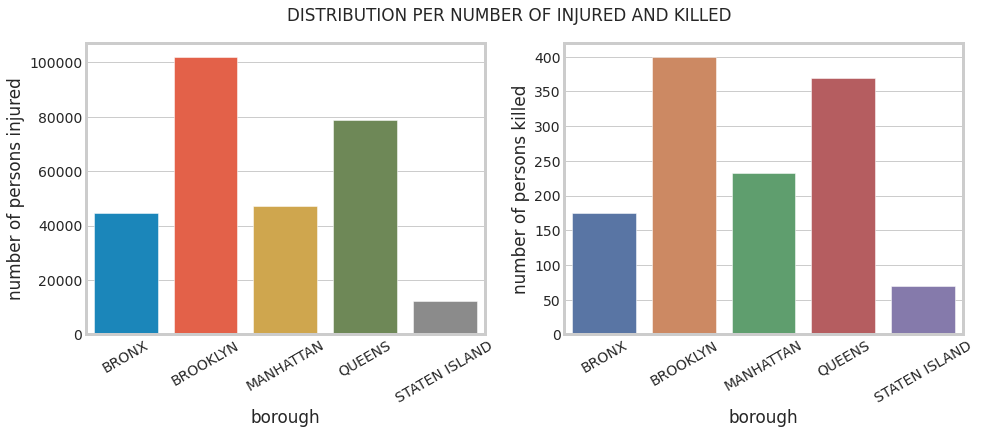

In [11]:
accidents_bor_df = df.groupby('borough')[['number of persons injured', 'number of persons killed']].sum()


fig, ax = plt.subplots(1,2,figsize=(14,5))
plt.suptitle('DISTRIBUTION PER NUMBER OF INJURED AND KILLED')

ax[1].set_xticklabels(labels=accidents_bor_df.index,rotation=30)
ax[0].set_xticklabels(labels=accidents_bor_df.index,rotation=30)


sns.barplot(accidents_bor_df.index, accidents_bor_df['number of persons injured'], ax=ax[0])
sns.barplot(accidents_bor_df.index, accidents_bor_df['number of persons killed'], ax=ax[1], palette='deep')



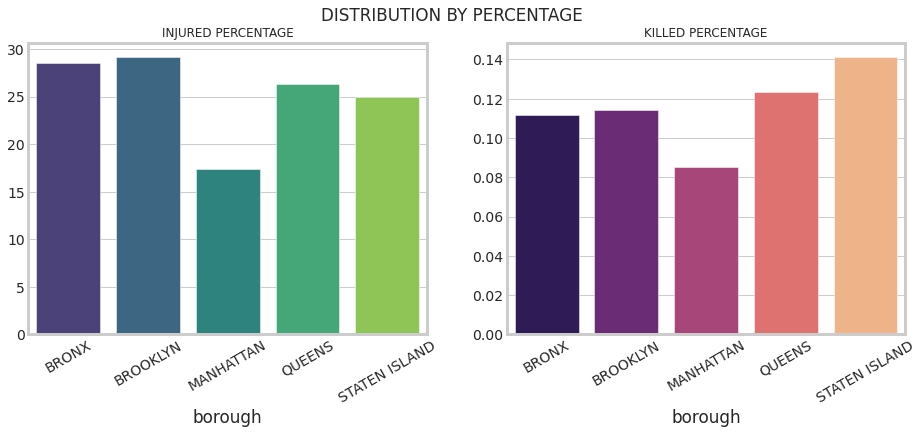

In [12]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
plt.suptitle('DISTRIBUTION BY PERCENTAGE')

ax[1].set_xticklabels(labels=accidents_bor_df.index,rotation=30)
ax[0].set_xticklabels(labels=accidents_bor_df.index,rotation=30)
ax[0].set_title('INJURED PERCENTAGE', fontsize=12)
ax[1].set_title('KILLED PERCENTAGE', fontsize=12)


sns.barplot((accidents_bor_df['number of persons injured'] / df.groupby('borough').size() *100).index, 
           (accidents_bor_df['number of persons injured'] / df.groupby('borough').size() *100).values, ax=ax[0], palette='viridis')

sns.barplot((accidents_bor_df['number of persons killed'] / df.groupby('borough').size() *100).index, 
           (accidents_bor_df['number of persons killed'] / df.groupby('borough').size() *100).values, ax=ax[1], palette='magma')

In [13]:
print('MEAN INJURED: ',(accidents_bor_df['number of persons injured'] / df.groupby('borough').size() *100).values.mean())
print('MEAN KILLED: ',(accidents_bor_df['number of persons killed'] / df.groupby('borough').size() *100).values.mean())

MEAN INJURED:  25.258721101545422
MEAN KILLED:  0.1151597454148819


### INSIGHTS
---
* From the information above, There is a 25% chance that you will get injured if you get into an road accident.
* Probability of getting killed on an accident is low.

### DATEWISE ANALYSIS

#### ROAD ACCIDENTS PER DAY

In [14]:
datewise = df.groupby(['accident date', 'borough'])[[i for i in df.columns if 'number' in i]].sum()

In [15]:
fig = make_subplots(rows=2,cols=1, 
                    subplot_titles=('NUMBER OF INJURED PER DAY', 'NUMBER OF KILLED PER DAY'))
cols = ['QUEENS', 'BROOKLYN', 'MANHATTAN', 'BRONX', 'STATEN ISLAND']
feat  = [i for i in df.columns if 'number' in i] + ['accident date']

for i, bor in enumerate(cols):
    data_per_bor = df[df['borough']== bor][feat]
    data_per_bor = data_per_bor.groupby('accident date').sum()
    
    fig.add_trace(go.Scatter(x=data_per_bor.index, y=data_per_bor['number of persons injured'], name=bor), row=1,col=1)
    fig.add_trace(go.Scatter(x=data_per_bor.index, y=data_per_bor['number of persons killed'], name=bor), row=2, col=1)

fig.update_layout(template='plotly_dark', width=1000, height=800)
fig.show()

1. #### SNIPPET OF NUMBER OF ACCIDENTS (LAST 365 DAYS)

In [16]:
fig = make_subplots(rows=2,cols=1, 
                    subplot_titles=('NUMBER OF INJURED PER DAY', 'NUMBER OF KILLED PER DAY'))
cols = ['QUEENS', 'BROOKLYN', 'MANHATTAN', 'BRONX', 'STATEN ISLAND']
feat  = [i for i in df.columns if 'number' in i] + ['accident date']

for i, bor in enumerate(cols):
    data_per_bor = df[df['borough']== bor][feat]
    data_per_bor = data_per_bor.groupby('accident date').sum()[-365:]
    
    fig.add_trace(go.Scatter(x=data_per_bor.index, y=data_per_bor['number of persons injured'], name=bor), row=1,col=1)
    fig.add_trace(go.Scatter(x=data_per_bor.index, y=data_per_bor['number of persons killed'], name=bor), row=2, col=1)

fig.update_layout(template='plotly_dark', width=1000, height=800)
fig.show()

#### AVERAGE OF ROAD ACCIDENT IN A DAY

In [17]:
df.groupby('accident date').size().mean()

596.660991857883

### INSIGHTS
---
* As we can see from the plot above, the highest number of people killed per day on a car accident is 8, which was October october 2017, a terror attack that also injured 11 people.
* There are approximately 597 road accident in a day.

#### WEEK OF MONTH

In [18]:
weekwise = df.copy()

def week_of_month(tgtdate):

    days_this_month = calendar.mdays[tgtdate.month]
    for i in range(1, days_this_month):
        d = datetime.datetime(tgtdate.year, tgtdate.month, i)
        if d.day - d.weekday() > 0:
            startdate = d
            break
    # now we canuse the modulo 7 appraoch
    return (tgtdate - startdate).days //7 + 1

weekwise['weekofmonth'] = weekwise['accident date'].apply(lambda d: (d.day-1) // 7 + 1)
weekwise['weekofyear'] = weekwise['accident date'].dt.weekofyear
weekwise['month'] = weekwise['accident date'].dt.month
weekwise['year'] = weekwise['accident date'].dt.year

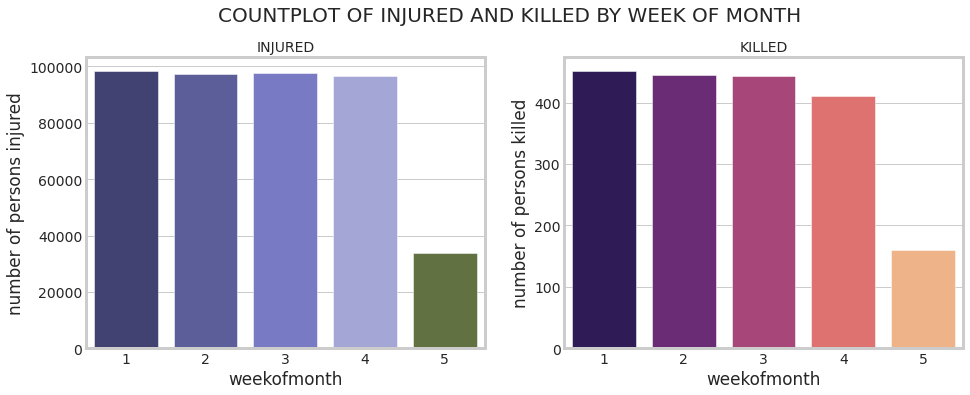

In [19]:
weekwise_month = weekwise.groupby('weekofmonth')[[i for i in weekwise.columns if 'number' in i]].sum()

fig,ax = plt.subplots(1,2,figsize=(14,5))
plt.suptitle('COUNTPLOT OF INJURED AND KILLED BY WEEK OF MONTH', x=0.5, y=1.02, fontsize=20)
ax[0].set_title('INJURED', fontsize=14)
ax[1].set_title('KILLED', fontsize=14)


sns.barplot(x=weekwise_month['number of persons injured'].index ,y=weekwise_month['number of persons injured'], ax=ax[0], palette='tab20b')
sns.barplot(x=weekwise_month['number of persons killed'].index ,y=weekwise_month['number of persons killed'], ax=ax[1], palette='magma')

#### WEEK OF YEAR

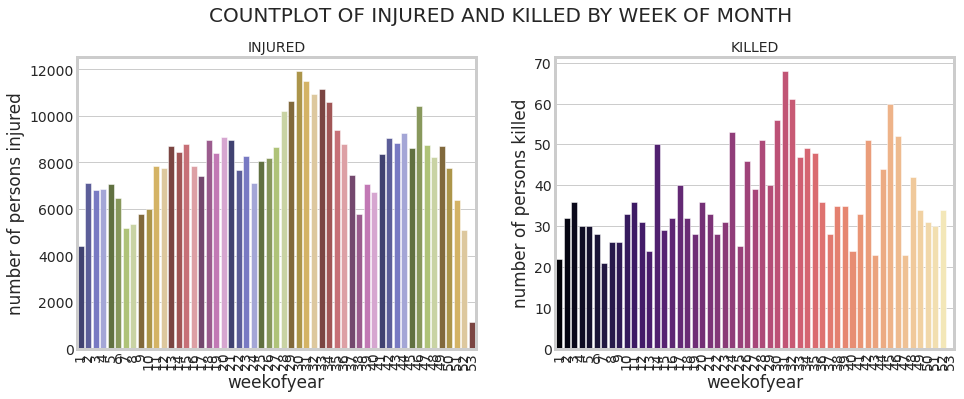

In [20]:
weekwise_year = weekwise.groupby('weekofyear')[[i for i in weekwise.columns if 'number' in i]].sum()

fig,ax = plt.subplots(1,2,figsize=(14,5))
ax[1].set_xticklabels(labels=accidents_bor_df.index,rotation=90)
ax[0].set_xticklabels(labels=accidents_bor_df.index,rotation=90)

plt.suptitle('COUNTPLOT OF INJURED AND KILLED BY WEEK OF MONTH', x=0.5, y=1.02, fontsize=20)
ax[0].set_title('INJURED', fontsize=14)
ax[1].set_title('KILLED', fontsize=14)


sns.barplot(x=weekwise_year['number of persons injured'].index ,y=weekwise_year['number of persons injured'], ax=ax[0], palette='tab20b')
sns.barplot(x=weekwise_year['number of persons killed'].index ,y=weekwise_year['number of persons killed'], ax=ax[1], palette='magma')

### BY MONTH

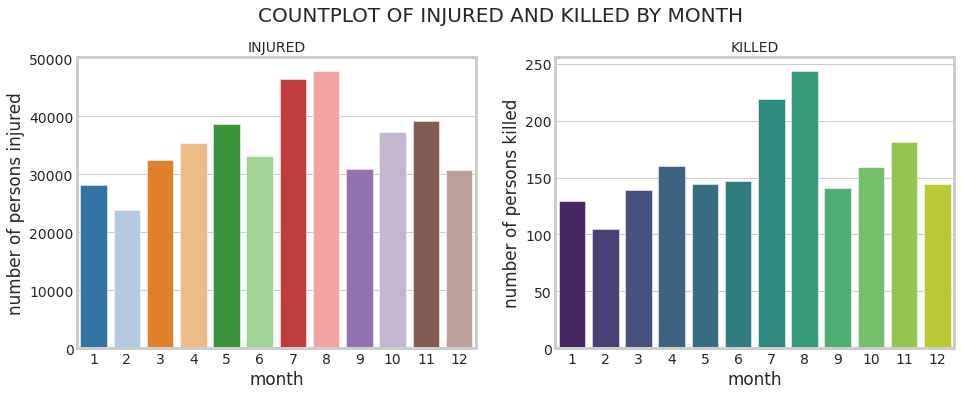

In [35]:
by_month = weekwise.groupby('month')[[i for i in weekwise.columns if 'number' in i]].sum()

fig,ax = plt.subplots(1,2,figsize=(14,5))
plt.suptitle('COUNTPLOT OF INJURED AND KILLED BY MONTH', x=0.5, y=1.02, fontsize=20)
ax[0].set_title('INJURED', fontsize=14)
ax[1].set_title('KILLED', fontsize=14)


sns.barplot(x=by_month['number of persons injured'].index ,y=by_month['number of persons injured'], ax=ax[0], palette='tab20')
sns.barplot(x=by_month['number of persons killed'].index ,y=by_month['number of persons killed'], ax=ax[1], palette='viridis')

### BY YEAR

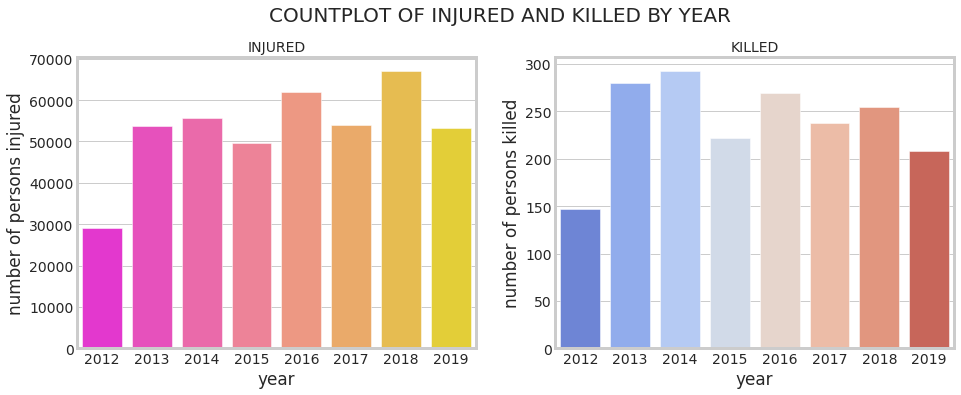

In [31]:
by_year = weekwise.groupby('year')[[i for i in weekwise.columns if 'number' in i]].sum()

fig,ax = plt.subplots(1,2,figsize=(14,5))
plt.suptitle('COUNTPLOT OF INJURED AND KILLED BY YEAR', x=0.5, y=1.02, fontsize=20)
ax[0].set_title('INJURED', fontsize=14)
ax[1].set_title('KILLED', fontsize=14)


sns.barplot(x=by_year['number of persons injured'].index ,y=by_year['number of persons injured'], ax=ax[0], palette='spring')
sns.barplot(x=by_year['number of persons killed'].index ,y=by_year['number of persons killed'], ax=ax[1], palette='coolwarm')

In [72]:
per_day_val = round(df.shape[0]/df.groupby('accident date')['number of persons injured'].count().shape[0],2)
per_week_val = round(per_day_val * 7, 2)
per_month_val = round(per_day_val * 30, 2)
per_year_val = per_month_val * 12
per_hour_val = (per_day_val / 24)
per_5mins_val = (per_day_val / 24) /60  * 5

index = ['5mins', 'Hour', 'Day', 'Week', 'Month', 'Year']
data = [per_5mins_val, per_hour_val, per_day_val, per_week_val, per_month_val, per_year_val]
pd.DataFrame(index=index, data=data, columns=['Value']).T

,5mins,Hour,Day,Week,Month,Year
Value,2.071736,24.860833,596.66,4176.62,17899.8,214797.6


### INSIGHTS
---
* According to data above, There are approximately:
    * 217800 Road Accidents per year
    * 19,000 Road Accidents per month
    * 4177 Road Accidents per week
    * 597 Road Accidents per day
    * 25 Road Accidents per hour
    * 2 Road Accidents per 5 minutes

## PER ROAD ACCIDENT TYPE ANALYSIS
---

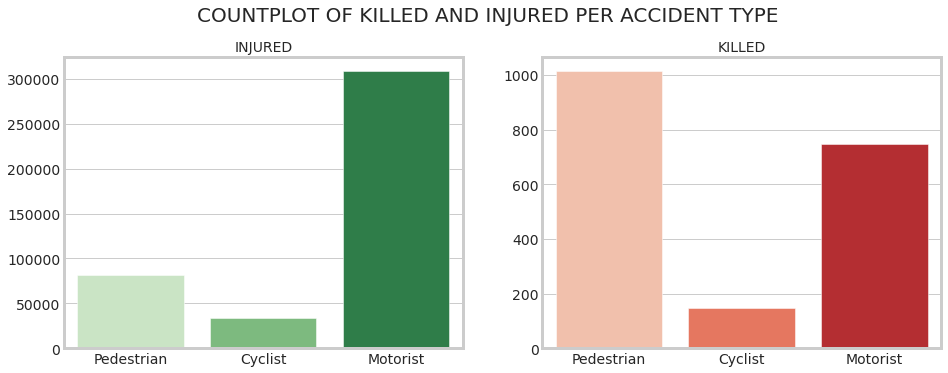

In [22]:
gr_injured = df[[i for i in df.columns for c in ['pedestrians injured', 'cyclist injured', 'motorist injured'] if c in i]].sum()
gr_killed = df[[i for i in df.columns for c in ['pedestrians killed', 'cyclist killed', 'motorist killed'] if c in i]].sum()
gr_injured.index = ['Pedestrian', 'Cyclist', 'Motorist']
gr_killed.index = ['Pedestrian', 'Cyclist', 'Motorist']


fig, ax = plt.subplots(1,2,figsize=(14,5))
plt.suptitle('COUNTPLOT OF KILLED AND INJURED PER ACCIDENT TYPE', fontsize=20, x=0.5,y=1.02)
ax[0].set_title('INJURED', fontsize=14)
ax[1].set_title('KILLED', fontsize=14)

sns.barplot(gr_injured.index, gr_injured.values, ax=ax[0], palette='Greens')
sns.barplot(gr_killed.index, gr_killed.values, ax=ax[1], palette='Reds')




In [23]:
fig = make_subplots(rows=3,cols=1,
                    subplot_titles=('PEDESTRIAN', 'CYCLIST', 'MOTORIST'))

feat_in  = ['number of pedestrians injured',
         'number of cyclist injured',
         'number of motorist injured']

feat_killed = ['number of pedestrians killed', 
         'number of cyclist killed', 
         'number of motorist killed']

for i, atype in enumerate(feat_in):
    data_per_acc = df.groupby('accident date')[atype].sum()
    data_per_acc1 = df.groupby('accident date')[feat_killed[i]].sum()
    
    fig.add_trace(go.Scatter(x=data_per_acc.index, y=data_per_acc.values, name='Injured'), row=i+1,col=1)
    fig.add_trace(go.Scatter(x=data_per_acc1.index, y=data_per_acc1.values, name='Killed'), row=i+1, col=1)

fig.update_layout(title='NUMBER OF KILLED AND INJURED PER ACCIDENT TYPE',template='plotly_dark', width=1000, height=1100)
fig.show()

## CAUSES OF THE ROAD ACCIDENTS IN NEW YORK CITY
---

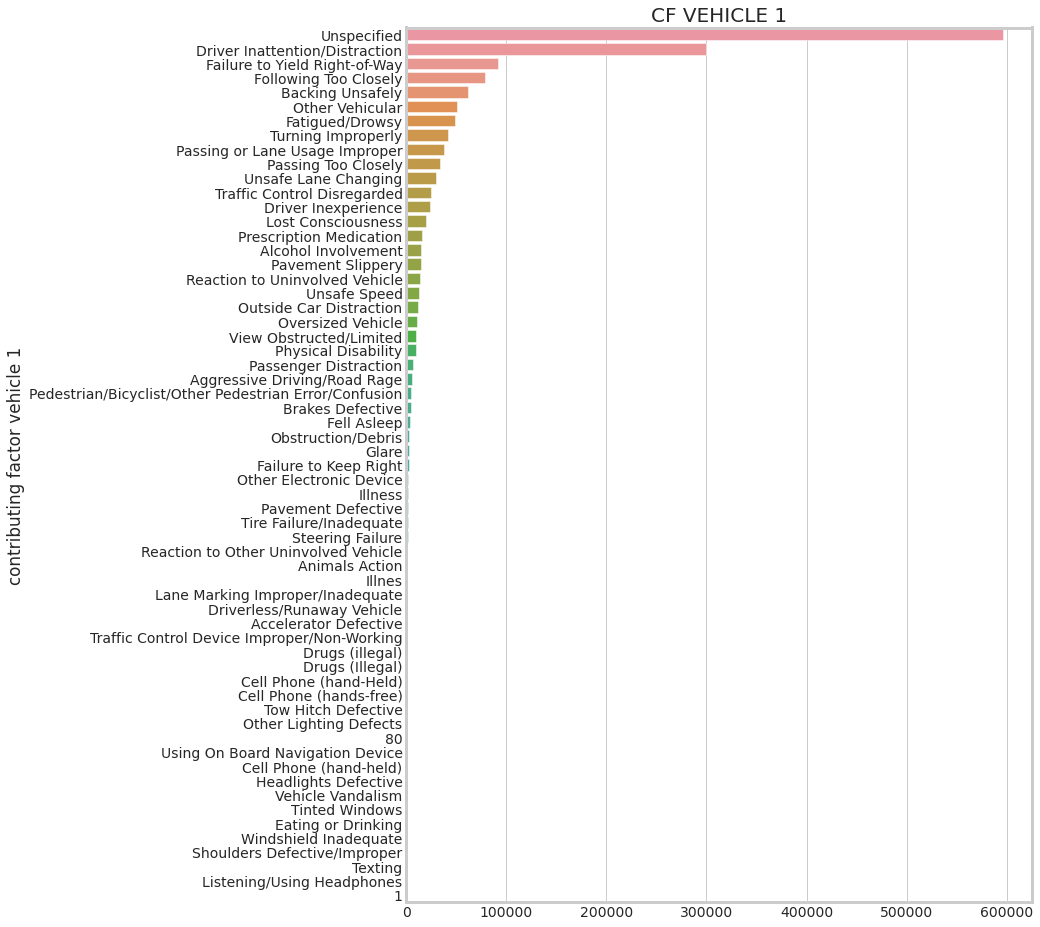

In [83]:
contri_df = df.groupby('contributing factor vehicle 1').size().sort_values(ascending=False)

plt.figure(figsize=(10,15))
plt.title('CF VEHICLE 1', fontsize=20)

sns.barplot(y = contri_df.index, x = contri_df.values)

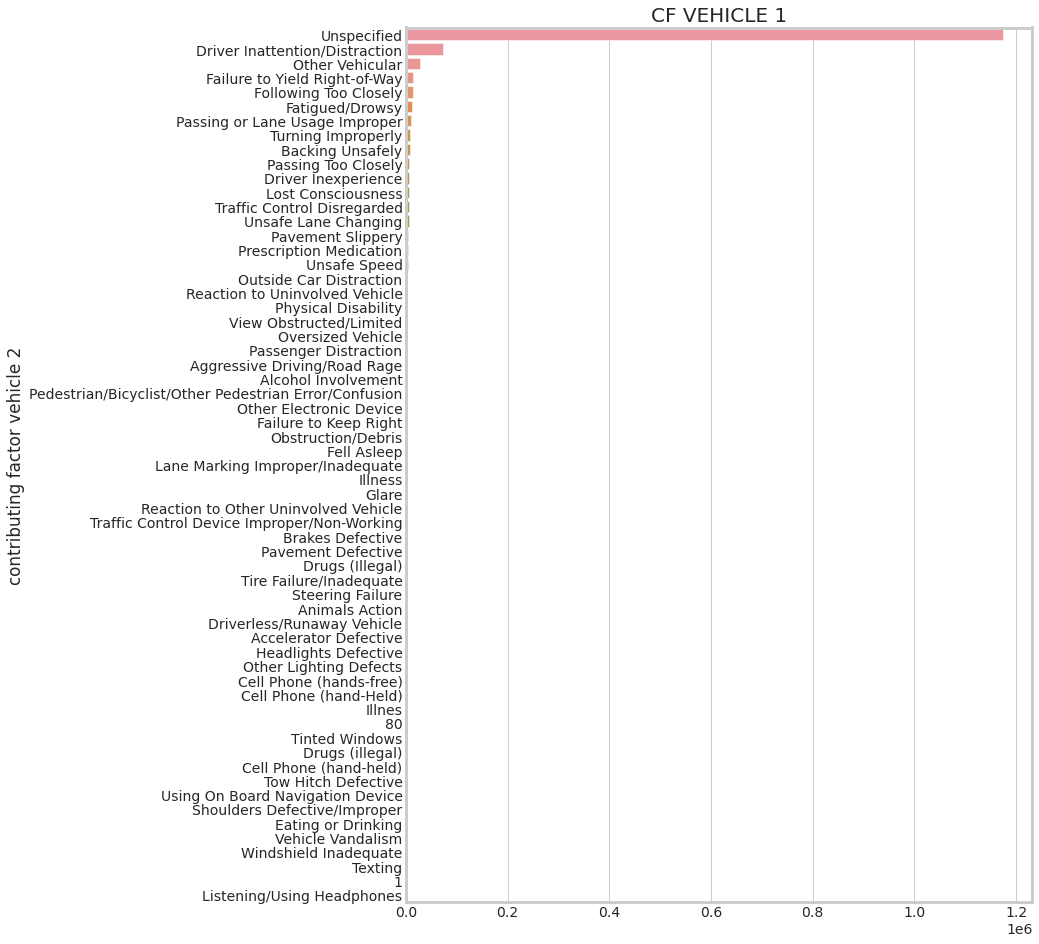

In [84]:
contri_df = df.groupby('contributing factor vehicle 2').size().sort_values(ascending=False)

plt.figure(figsize=(10,15))
plt.title('CF VEHICLE 2', fontsize=20)

sns.barplot(y = contri_df.index, x = contri_df.values)

* TO BE CONTINUED